2D Poisson equation: $\Delta u = f = u_{xx}+u_{yy} + s^2u$ <br> 
x element of [0,1] <br> y element of [0,1] <br>

Discretized equation with 5-point scheme: $\frac{u^{j}_{i-1}-2u^{j}_{i}+u^{j}_{i+1}}{\Delta x^2} + \frac{u^{j-1}_{i}-2u^{j}_{i}+u^{j+1}_{i}}{\Delta y^2} + s^{2j}_{i}u^{j}_{i}
= \delta(x-0.5,y-0.5) $ <br>

The Dirac delta function is evaluated by setting the center point to the random draw if fidelity is odd or setting the center 2x2 grid to the value if it is even. 

$\Delta y = \Delta x$

-> $u^j_{i-1} + u^{j-1}_i + u^j_{i+1} + u^{j+1}_i+(-4+\Delta x^2 s^{2j}_{i})u^j_i = \Delta x^2 \delta(x-0.5,y-0.5)$ where $s^2=\frac{\omega^2}{c^2}$

https://www.davidpublisher.com/Public/uploads/Contribute/5b5a8959b194f.pdf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import pdb, time
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
from tqdm import tqdm
from skimage import data
from scipy.ndimage import zoom
from scipy import ndimage, datasets
from scipy.io import loadmat, savemat
# from itkwidgets import view
from operators import *

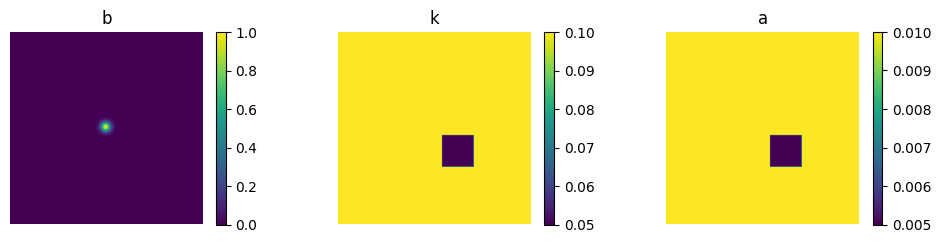

In [3]:
size, h = 128, 1
xx, yy = np.meshgrid(np.linspace(1,size,size), np.linspace(1,size,size), indexing='ij')
b = np.exp(-((xx-size//2)**2+(yy-size//2)**2)/(2*5))
k= np.ones_like(b)
k[round(size/2)+5:round(size*2/3)+5,round(size/2)+5:round(size*2/3)+5]=0.5
a=k*0.01
k=k*0.1

plt.figure(figsize=(12,2.5))
plt.subplot(1,3,1)
plt.title('b')
plt.imshow(b)
plt.axis('off')
plt.colorbar()

plt.subplot(1,3,2)
plt.title('k')
plt.imshow(k)
plt.axis('off')
plt.colorbar()

plt.subplot(1,3,3)
plt.title('a')
plt.imshow(a)
plt.axis('off')
plt.colorbar()

running time:  2.4376044273376465


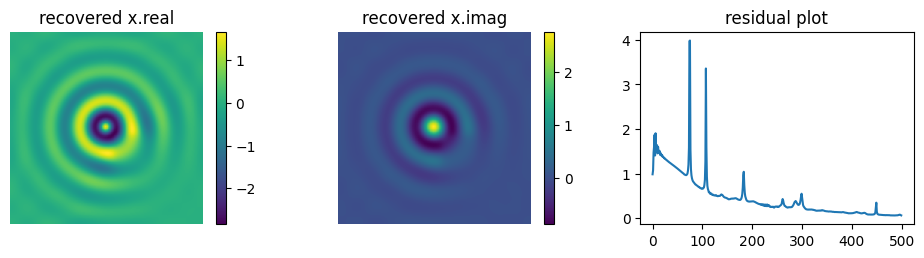

In [5]:
'''helmholtz solver'''
# Ab = A_helmholtz(b, k, h)
# recovered_x, residual_list = helmholtz_cgsolver_psd(Ab, k, h, iteration=500, bc='periodic')

'''westervelt solver'''
start = time.time()
# A*Ax=A*b, where A_westervelt(Ax, k, -delta, h, bc) is the A* (conjugate)
Ab = A_westervelt(b, k, -a, h)
recovered_x, residual_list = westervelt_cgsolver_psd(Ab, k, a, h, iteration=500, bc='neumann')
print('running time: ', time.time()-start)

plt.figure(figsize=(12,2.5))
plt.subplot(1,3,1)
plt.title('recovered x.real')
plt.imshow(recovered_x.real)
plt.axis('off')
plt.colorbar()

plt.subplot(1,3,2)
plt.title('recovered x.imag')
plt.imshow(recovered_x.imag)
plt.axis('off')
plt.colorbar()

plt.subplot(1,3,3)
plt.title('residual plot')
plt.plot(residual_list)